## Name: Ravi Sista

### Task 3: Prediction using Decision Tree Algorithm
Here we've taken **Iris Data set** into consideration. Basic aim is to create a Decision Tree calssifier & Visualize it graphically. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv("iris.csv", index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df.shape

(150, 5)

**There are no missing values**

In [5]:
target = df['Species']
df1 = df.copy()
df1 = df1.drop('Species', axis = 1)
df1.shape

(150, 4)

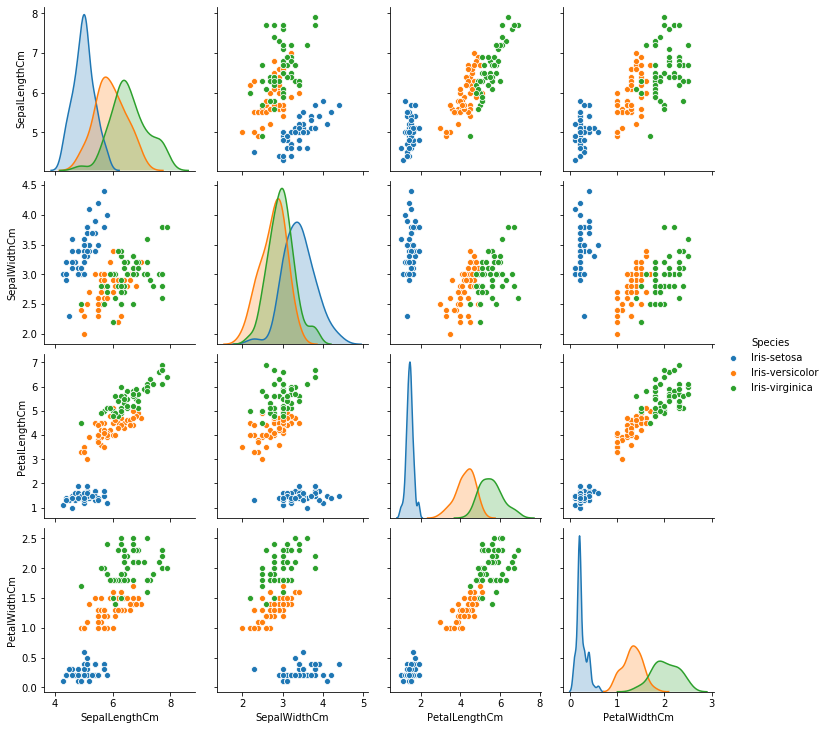

In [6]:
sns.pairplot(df,hue = 'Species')

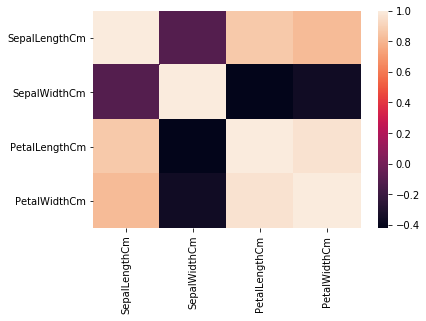

In [7]:
sns.heatmap(df.corr())

PetalLength is highly correlated with PetalWidth

In [8]:
X =  df.iloc[:, [0, 1, 2, 3]].values

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

y = df['Species'].values

print("The shape of the data is ", df.shape)

The shape of the data is  (150, 5)


In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


### Model Training

In [10]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)
print("Training split - ", X_train.shape, y_train.shape)
print("Testing split - ", X_test.shape, y_test.shape)

Training split -  (120, 4) (120,)
Testing split -  (30, 4) (30,)


In [11]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
y_pred = dt.predict(X_test)

print("Classification Report: \n",classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        12
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(0.5, 1, 'Accuracy Score: 0.9666666666666667')

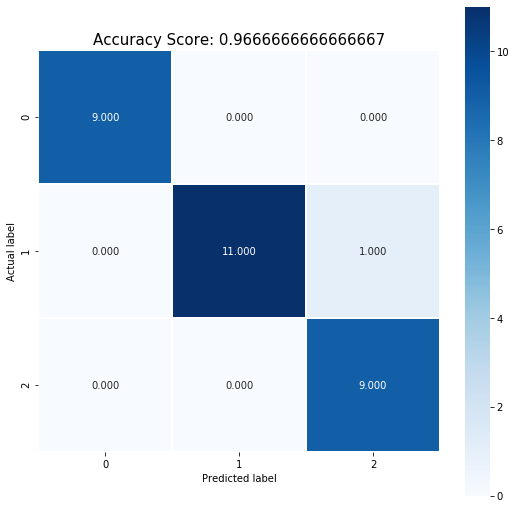

In [13]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(dt.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

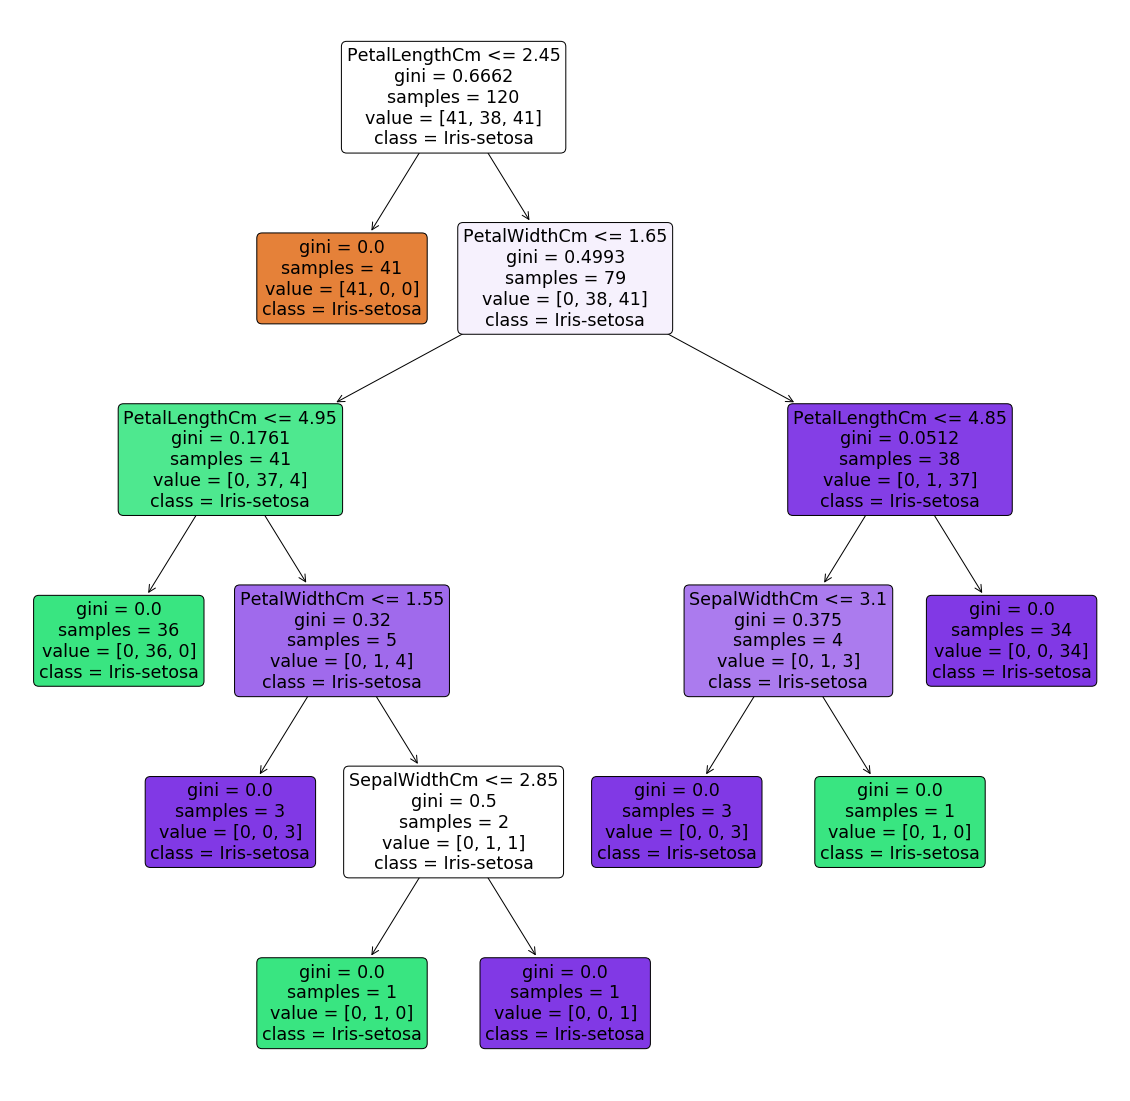

In [14]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (20,20))
dec_tree = plot_tree(dt, feature_names = df1.columns, 
                     class_names = target.values, filled = True , precision = 4, rounded = True);